In [7]:
# visualizing PSO on a function defined by the distance of a point to a cubic polynomial
# the objective is to find the global mimumum of this function

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm 
import random
import matplotlib.animation
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


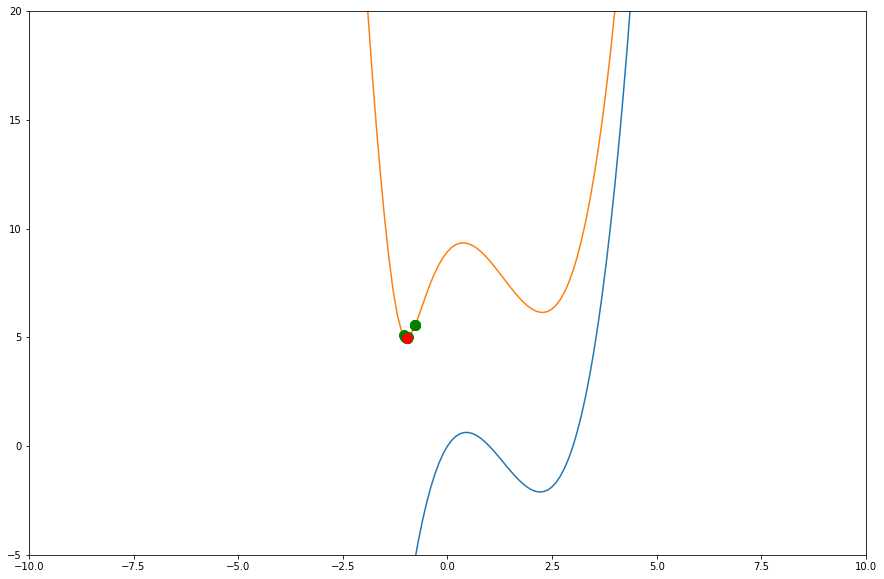

In [2]:
# The graph

rr = np.arange(-150, 200, 0.1)

#Px = 6
#Py = 0

Px = 4
Py = -8


def cubic(x): 
    return 0 + 3 * x - 4 * x * x + x*x*x

def dist_to_cubic(x, x1, y1):
    y = cubic(x)
    return math.sqrt((x - x1) * (x - x1) + (y - y1) * (y - y1))

dist2 = np.vectorize(dist_to_cubic)

# PSO particles init

n = 10
xmin = -5
xmax = 5

pos = np.zeros(n)
vel = np.zeros(n)
localBestPos = np.zeros(n)
localBestVal = np.full(n, 1000) # setting to large value of 1000
value = np.zeros(n)

globalBestPos = 0
globalBestVal = 1000

for i in range(n):
    pos[i] = random.uniform(xmin, xmax)
    val = dist_to_cubic(pos[i], Px, Py)
    if val < localBestVal[i] :
        localBestVal[i] = val
        localBestPos[i] = pos[i]
    if val < globalBestVal :
        globalBestVal = val
        globalBestPos = pos[i]

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.axis([-10, 10, -5, 20])
ax.plot(rr, cubic(rr))
ax.plot(rr, dist2(rr, Px, Py))
ax.plot([Px], [Py], 'ro', markersize=10)
l, = ax.plot([],[], 'go', markersize=10)
ll, = ax.plot([],[], 'ro', markersize=10)

#PSO

inertia = 0.7298
cogPar = 1.49618
socPar = 1.49618
iterations = 50

def runPSO(t):
    global globalBestVal
    global globalBestPos
    r1 = random.uniform(0, 1)
    r2 = random.uniform(0, 1)
    for i in range(n):
        vel[i] = inertia * vel[i] + r1 * cogPar * (localBestPos[i] - pos[i]) + r2 * socPar * (globalBestPos - pos[i]) 
        pos[i] = pos[i] + vel[i]
        val = dist_to_cubic(pos[i], Px, Py)
        if val < localBestVal[i] :
            localBestVal[i] = val
            localBestPos[i] = pos[i]
        if val < globalBestVal :
            globalBestVal = val
            globalBestPos = pos[i]
    
    l.set_data(pos, dist2(pos, Px, Py))
    ll.set_data([globalBestPos], [dist_to_cubic(globalBestPos, Px, Py)])

ani = matplotlib.animation.FuncAnimation(fig, runPSO, frames=iterations)

from IPython.display import HTML
HTML(ani.to_jshtml())

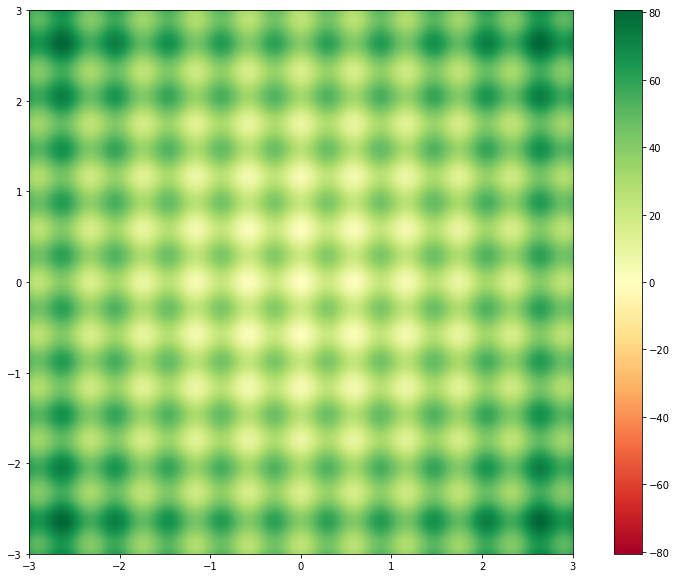